do Problems: Experiment, Steady States, Adaptive and Sensitivity


In [2]:
from numlabs.lab5.lab5_funs_copy import Integrator
from collections import namedtuple
import numpy as np


class Integ61(Integrator):
   
    def __init__(self, coeff_file_name,initvars=None,uservars=None,
                timevars=None):
        super().__init__(coeff_file_name)
        self.set_yinit(initvars,uservars,timevars)
        
    def set_yinit(self,initvars,uservars,timevars):
        #
        # read in 'sigma beta rho', override if uservars not None
        #
        if uservars:
            self.config['uservars'].update(uservars)
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'x y z'
        #
        if initvars:
            self.config['initvars'].update(initvars)
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        #
        # set dt, tstart, tend if overiding base class values
        #
        if timevars:
            self.config['timevars'].update(timevars)
            timevars = namedtuple('timevars', self.config['timevars'].keys())
            self.timevars = timevars(**self.config['timevars'])
        self.yinit = np.array(
            [self.initvars.x, self.initvars.y, self.initvars.z])
        self.nvars = len(self.yinit)
    
    def derivs5(self, coords, t):
        x,y,z = coords
        u=self.uservars
        f=np.empty_like(coords)
        f[0] = u.sigma * (y - x)
        f[1] = x * (u.rho - z) - y
        f[2] = x * y - u.beta * z
        return f

<a name="prob_experiment"></a>
**[Problem Experiment](#prob_experiment)** Lorenz’ results are based on the following values
of the physical parameters taken from Saltzman’s paper (Saltzman, 1962):
$$\sigma=10 \quad \mathrm{and} \quad b=\frac{8}{3}.$$ As you will see
in [Section stability](#sec_stability), there is a *critical value of the
parameter $\rho$*, $\rho^\ast=470/19\approx 24.74$ (for these values of
$\sigma$ and $\beta$); it is *critical* in the sense that for
any value of $\rho>\rho^\ast$, the flow is unstable.

To allow you to investigate the behaviour of the solution to the Lorenz
equations, you can try out various parameter values in the following
interactive example. *Initially, leave $\sigma$ and $\beta$ alone, and
modify only $\rho$ and the initial conditions.* If you have time,
you can try varying the other two parameters, and see what happens. Here
are some suggestions:

-   Fix the initial conditions at $(5,5,5)$ and vary $\rho$ between $0$ and
    $100$.

-   Fix $\rho=28$, and vary the initial conditions; for example, try
    $(0,0,0)$, $(0.1,0.1,0.1)$, $(0,0,20)$, $(100,100,100)$,
    $(8.5,8.5,27)$, etc.

-   Anything else you can think of …

1.  Describe the different types of behaviour you see and compare them
    to what you saw in [Figure fixed-plot](#fig_fixed-plot). Also, discuss the
    results in terms of what you read in [Section Introduction](#sec_introduction)
    regarding the four properties of the solution.

2.  One question you should be sure to ask yourself is: *Does
    changing the initial condition affect where the solution ends
    up?* The answer to this question will indicate whether there
    really is an attractor which solutions approach as
    $t\rightarrow\infty$.

3.  Finally, for the different types of solution behaviour, can you
    interpret the results physically in terms of the thermal convection
    problem?

/Users/alena/Sync/numeric/numlabs/lab5/lab5_funs_copy.py:174: RuntimeWarning: divide by zero encountered in double_scalars
  dtchange = a.s * (1.0 / errtest)**0.2


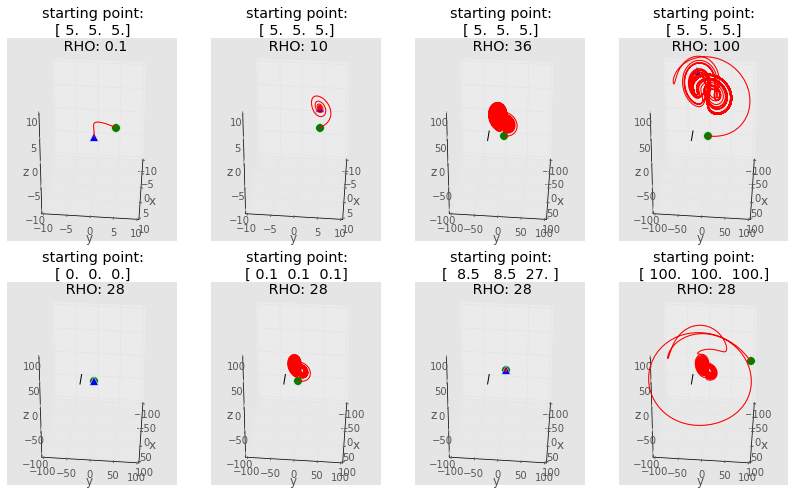

In [4]:
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')

def plot_3d(ax,xvals,vals,zvals):
    """
        plot a 3-d trajectory with start and stop markers
    """
    line,=ax.plot(xvals,yvals,zvals,'r-')
    ax.set_xlim((-30, 30))
    ax.set_ylim((-30, 30))
    ax.set_zlim((-30, 30))
    ax.grid(True)
    #
    # look down from 30 degree elevation and an azimuth of
    #
    ax.view_init(30,5)
    line,=ax.plot(xvals,yvals,zvals,'r-')
    ax.plot([-20,15],[-30,-30],[0,0],'k-')
    ax.scatter(xvals[0],yvals[0],zvals[0],marker='o',c='green',s=75)
    ax.scatter(xvals[-1],yvals[-1],zvals[-1],marker='^',c='blue',s=75)
    out=ax.set(xlabel='x',ylabel='y',zlabel='z')
    line.set(alpha=0.2)
    return ax

fig = plt.figure(figsize=(14,8))
file_list = ['lorenz2.yaml','lorenz3.yaml','lorenz4.yaml','lorenz9.yaml','lorenz5.yaml','lorenz6.yaml','lorenz7.yaml','lorenz8.yaml','lorenz9.yaml','lorenz10.yaml']
rho_list = ['0.1','10','36','100','28','28','28','28']
for i in range(1,9):
    theSolver = Integ61(file_list[i-1])
    timevals, coords, errorlist, g ,w= theSolver.timeloop5Err()
    xvals,yvals,zvals=coords[:,0],coords[:,1],coords[:,2]
# top figure
    ax = fig.add_subplot(2,4,i, projection='3d')
    ax=plot_3d(ax,xvals,yvals,zvals)
    ax.set_xlim([-100,100])
    ax.set_ylim([-100,100])
    ax.set_zlim([-100,100])
    
    if (i <3):
        ax.set_xlim([-10,10])
        ax.set_ylim([-10,10])
        ax.set_zlim([-10,10])
    out=ax.set(title='starting point: \n' + str(coords[0,:]) + '\n RHO: ' + rho_list[i-1])
    
plt.show()

**[Problem steady-states](#prob_steady-states)** Set the time derivatives equal to zero in the
Lorenz equations ([eq:lorenz](#eq_lorenz)), and solve the
resulting system to show that there are three possible steady states,
namely the points

-   $(0,0,0)$,

-   $(\sqrt{\beta(\rho-1)},\sqrt{\beta(\rho -1)},\rho -1)$, and

-   $(-\sqrt{\beta (\rho -1)},-\sqrt{\beta(\rho-1)},\rho-1)$.

Remember that $\rho$ is a positive real number, so that that there is
*only one* stationary point when $0\leq \rho \leq 1$, but all
three stationary points are present when $\rho >1$.

While working through [Problem experiment](#prob_experiment), did you notice the
change in behaviour of the solution as $\rho$ passes through the value 1?
If not, then go back to the interactive example and try out some values
of $\rho$ both less than and greater than 1 to see how the solution
changes.

I solved the system on paper below & did find the steady state points :

<img src=files/IMG_1421.JPG>

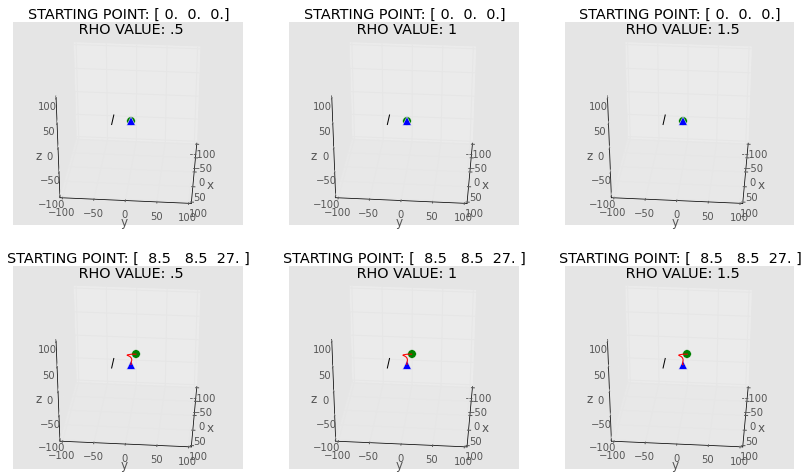

In [5]:
fig = plt.figure(figsize=(14,8))
file_list = ['lorenz11.yaml','lorenz12.yaml','lorenz13.yaml','lorenz14.yaml','lorenz15.yaml','lorenz16.yaml']
rho_val = ['.5','1','1.5','.5','1','1.5']
for i in range(1,7):
    theSolver = Integ61(file_list[i-1])
    timevals, coords, errorlist = theSolver.timeloop5fixed()

    xvals,yvals,zvals=coords[:,0],coords[:,1],coords[:,2]
# top figure
    ax = fig.add_subplot(2,3,i, projection='3d')
    ax=plot_3d(ax,xvals,yvals,zvals)
    ax.set_xlim([-100,100])
    ax.set_ylim([-100,100])
    ax.set_zlim([-100,100])
    out=ax.set(title='STARTING POINT: ' + str(coords[0,:]) + '\n RHO VALUE: ' + rho_val[i-1])
    
    
plt.show()

<a name="prob_adaptive"></a>
**Problem Adaptive:**  You saw in that adaptive time-stepping saved a
considerable amount of computing time for the Daisy World problem. In
this problem, you will be investigating whether or not an adaptive
Runge-Kutta code is the best choice for the Lorenz equations.

Use the Integrator61 object to compute in both adaptive and
fixed timeloop solutions for an extended integration. 
Compare the number of time steps taken (plot the
time step vs. the integration time for both methods). Which method is
more efficient?  Which is fastest?  A simple way to time a portion of
a script is to use the ```time``` module to calculate the elapsed time:

```
import time
tic = time.time()
#program here
elapsed = time.time() - tic
```

To answer this last question, you will have to consider the cost of the
adaptive scheme, compared to the non-adaptive one. The adaptive scheme
is obviously more expensive, but by how much? You should think in terms
of the number of multiplicative operations that are required in every
time step for each method. You don’t have to give an exact operation
count, round figures will do.

Finally, we mentioned that the code that produced the animation uses
a C module called odeint.   It is called [here](https://github.com/phaustin/numeric/blob/lab6/lab6/lorenz_ode.py#L22-L23) using derivatives defined in 
[lorenz_deriv](https://github.com/phaustin/numeric/blob/lab6/lab6/lorenz_ode.py#L11-L14).
Use odeint to solve the same problem you did for the fixed and adaptive
timeloops.  What is the speed increase you see by using the compiled module?



HOW LONG (seconds) DID THE FIXED TIME LOOP TAKE?
1.6672639846801758
4795
517
HOW LONG (seconds) DID THE ADAPTIVE TIME LOOP TAKE?
1.90339994430542
4794


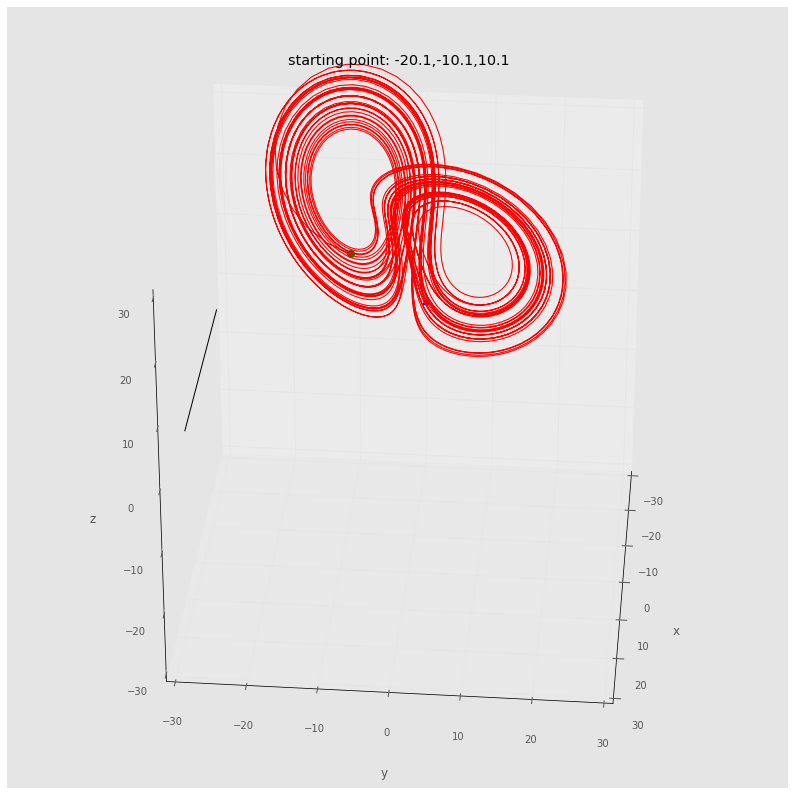

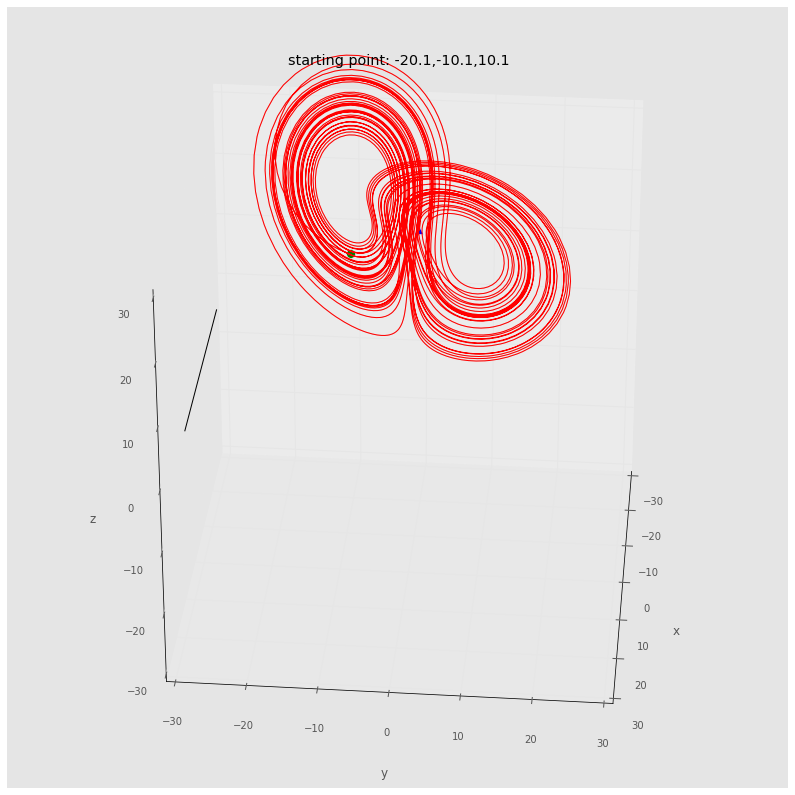

In [7]:
import numlabs.lab5.lab5_funs_copy
import importlib
importlib.reload(numlabs.lab5.lab5_funs_copy)
from numlabs.lab5.lab5_funs_copy import Integrator
import time

fig = plt.figure(figsize=(14,14))
for i in range(1,2):
    tic = time.time()
    theSolver = Integ61('lorenz17.yaml')
    timevals, coords, errorlist = theSolver.timeloop5fixed()
    xvals,yvals,zvals=coords[:,0],coords[:,1],coords[:,2]
    elapsed = time.time() - tic
    print("HOW LONG (seconds) DID THE FIXED TIME LOOP TAKE?")
    print(elapsed)
    w = len(xvals)
    print(w)
# top figure
    ax = fig.add_subplot(1,1,i, projection='3d')
    ax=plot_3d(ax,xvals,yvals,zvals)
    out=ax.set(title='starting point: {},{},{}'.format(*coords[0,:]))
    

fig = plt.figure(figsize=(14,14))
for i in range(1,2):
    tic = time.time()
    theSolver = Integ61('lorenz17.yaml')
    timevals, coords, errorlist, g  , w=theSolver.timeloop5Err()
    print(g)
    xvals,yvals,zvals=coords[:,0],coords[:,1],coords[:,2]
    elapsed = time.time() - tic
    print("HOW LONG (seconds) DID THE ADAPTIVE TIME LOOP TAKE?")
    print(elapsed)
    w = len(xvals)
    print(w)
# top figure
    ax = fig.add_subplot(1,1,i, projection='3d')
    ax=plot_3d(ax,xvals,yvals,zvals)
    out=ax.set(title='starting point: {},{},{}'.format(*coords[0,:]))

<a name="prob_sensitivity"></a>
**Problem Sensitivity**: One property of chaotic systems such as the
Lorenz equations is their *sensitivity to initial
conditions* – a consequence of the “butterfly effect.” Modify
your code from [Problem adaptive](#prob_adaptive) to compute two trajectories
(in the chaotic regime $r>r^\ast$) with different initial conditions
*simultaneously*. Use two initial conditions that are very
close to each other, say $(1,1,20)$ and $(1,1,20.001)$. Use your “method
of choice” (adaptive/non-adaptive), and plot the distance between the
two trajectories as a function of time. What do you see?

One important limitation of numerical methods is immediately evident
when approximating non-periodic dynamical systems such as the Lorenz
equations: namely, *every computed solution is periodic*.
That is, when we’re working in floating point arithmetic, there are only
finitely many numbers that can be represented, and the solution must
eventually repeat itself. When using single precision arithmetic, a
typical computer can represent many more floating point numbers than we
could ever perform integration steps in a numerical scheme. However, it
is still possible that round-off error might introduce a periodic orbit
in the numerical solution where one does not really exist. In our
computations, this will not be a factor, but it is something to keep in
mind.

In [ ]:
import numlabs.lab5.lab5_fun_simult
# import importlib
# importlib.reload(numlabs.lab5.lab5_funs_copy)

# fig = plt.figure(figsize=(14,14))
# for i in range(1,2):
#     tic = time.time()
#     theSolver = Integ61('lorenz17.yaml')
#     timevals, coords, errorlist = theSolver.timeloop5fixed()
#     xvals,yvals,zvals=coords[:,0],coords[:,1],coords[:,2]
#     elapsed = time.time() - tic
#     print("HOW LONG (seconds) DID THE FIXED TIME LOOP TAKE?")
#     print(elapsed)
#     w = len(xvals)
#     print(w)
# # top figure
#     ax = fig.add_subplot(1,1,i, projection='3d')
#     ax=plot_3d(ax,xvals,yvals,zvals)
#     out=ax.set(title='starting point: {},{},{}'.format(*coords[0,:]))
